<a href="https://colab.research.google.com/github/sayakpaul/TF-2.0-Hacks/blob/master/Weights_Visualization_TensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook accompanies with my article [The effects of weight initialization on neural nets](https://www.wandb.com/articles/the-effects-of-weight-initialization-on-neural-nets). 

In [0]:
# Selecting the right version of TensorFlow nad verifying it
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
# Weights and Biases for experiment tracking
!pip install wandb
!wandb login

In [0]:
# Gather data and preprocess it
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

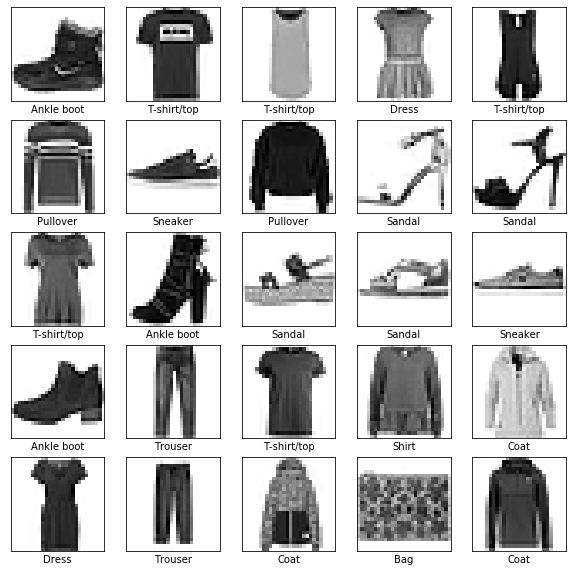

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[y_train[i]])
plt.show()

In [0]:
import wandb

In [0]:
def get_training_model(init_scheme='zeros'):
    if isinstance(init_scheme, str):
        wandb.init(project='weight-initialization-tb', sync_tensorboard=True,
                   id=init_scheme)
    else:
        wandb.init(project='weight-initialization-tb', sync_tensorboard=True,
                   id=str(init_scheme))
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer=init_scheme,
            bias_initializer='zeros'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=init_scheme,
            bias_initializer='zeros'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init_scheme,
            bias_initializer='zeros')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return model, wandb.run.dir

In [0]:
from wandb.keras import WandbCallback

In [0]:
model_w_zeros, run_dir = get_training_model()

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

model_w_zeros.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/sample - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
60000/60000 [==============================] - 3s 46us/sample - loss: 2.3027 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
60000/60000 [==============================] - 3s 44us/sample - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
60000/60000 [==============================] - 3s 42us/sample - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
60000/60000 [==============================] - 2s 41us/sample - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
60000/60000 [==============================] 

In [0]:
model_w_ones, run_dir = get_training_model(init_scheme='ones')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

model_w_ones.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 2229.0527 - accuracy: 0.1007 - val_loss: 2100.3664 - val_accuracy: 0.1000
Epoch 2/20
60000/60000 [==============================] - 2s 40us/sample - loss: 805.0972 - accuracy: 0.1002 - val_loss: 193.1670 - val_accuracy: 0.1000
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 262.6274 - accuracy: 0.0984 - val_loss: 182.9957 - val_accuracy: 0.1000
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 73.1662 - accuracy: 0.0994 - val_loss: 23.1904 - val_accuracy: 0.0971
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 10.1444 - accuracy: 0.1081 - val_loss: 3.3555 - val_accuracy: 0.1149
Epoch 6/20
60000/60000 [==============================] - 3s 44us/sample - loss: 2.7196 - accuracy: 0.1383 - val_loss: 2.2665 - val_accuracy: 0.1499
Epoch 7/20
60000/60000 [===============

In [0]:
model_w_uniform, run_dir = get_training_model(init_scheme=tf.keras.initializers.RandomUniform(minval=0, maxval=1, seed=666))

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

model_w_uniform.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/sample - loss: 21325.0095 - accuracy: 0.1001 - val_loss: 665.8834 - val_accuracy: 0.2236
Epoch 2/20
60000/60000 [==============================] - 2s 39us/sample - loss: 1303.5034 - accuracy: 0.2453 - val_loss: 3.5182 - val_accuracy: 0.4493
Epoch 3/20
60000/60000 [==============================] - 2s 39us/sample - loss: 3.8314 - accuracy: 0.3570 - val_loss: 1.9515 - val_accuracy: 0.4465
Epoch 4/20
60000/60000 [==============================] - 2s 39us/sample - loss: 2.3605 - accuracy: 0.3988 - val_loss: 1.6066 - val_accuracy: 0.4830
Epoch 5/20
60000/60000 [==============================] - 2s 39us/sample - loss: 1.9021 - accuracy: 0.4436 - val_loss: 1.4260 - val_accuracy: 0.5482
Epoch 6/20
60000/60000 [==============================] - 2s 38us/sample - loss: 1.6767 - accuracy: 0.4931 - val_loss: 1.3005 - val_accuracy: 0.5831
Epoch 7/20
60000/60000 [=======================

In [0]:
model_w_centered, run_dir = get_training_model(init_scheme=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=666))

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

model_w_centered.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/sample - loss: 2.7490 - accuracy: 0.6333 - val_loss: 0.6562 - val_accuracy: 0.7626
Epoch 2/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.7808 - accuracy: 0.7416 - val_loss: 0.5450 - val_accuracy: 0.8023
Epoch 3/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.6312 - accuracy: 0.7782 - val_loss: 0.4916 - val_accuracy: 0.8186
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5515 - accuracy: 0.8013 - val_loss: 0.4644 - val_accuracy: 0.8301
Epoch 5/20
60000/60000 [==============================] - 2s 42us/sample - loss: 0.5014 - accuracy: 0.8180 - val_loss: 0.4341 - val_accuracy: 0.8386
Epoch 6/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4678 - accuracy: 0.8292 - val_loss: 0.4218 - val_accuracy: 0.8476
Epoch 7/20
60000/60000 [==============================] 

In [0]:
def get_training_model_w_rule(init_scheme):
    if isinstance(init_scheme, str):
        wandb.init(project='weight-initialization-tb', sync_tensorboard=True,
                   id=init_scheme)
    else:
        wandb.init(project='weight-initialization-tb', sync_tensorboard=True,
                   id=str(init_scheme))
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return model, wandb.run.dir

In [0]:
import numpy as np

model_w_uniform_rule, run_dir = get_training_model_w_rule('uniform-rule')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

for layer in model_w_uniform_rule.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        shape = (layer.weights[0].shape[0], layer.weights[0].shape[1])
        y = 1.0/np.sqrt(shape[0])
        rule_weights = np.random.uniform(-y, y, shape)
        layer.weights[0] = rule_weights
        layer.weights[1] = 0

model_w_uniform_rule.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_w_uniform_rule.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5833 - accuracy: 0.7910 - val_loss: 0.4314 - val_accuracy: 0.8425
Epoch 2/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4082 - accuracy: 0.8526 - val_loss: 0.3905 - val_accuracy: 0.8590
Epoch 3/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3686 - accuracy: 0.8658 - val_loss: 0.3806 - val_accuracy: 0.8617
Epoch 4/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3459 - accuracy: 0.8739 - val_loss: 0.3625 - val_accuracy: 0.8664
Epoch 5/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3274 - accuracy: 0.8795 - val_loss: 0.3483 - val_accuracy: 0.8735
Epoch 6/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3159 - accuracy: 0.8837 - val_loss: 0.3474 - val_accuracy: 0.8763
Epoch 7/20
60000/60000 [==============================] 

In [0]:
import numpy as np

model_w_normal_rule, run_dir = get_training_model_w_rule('normal-rule')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

for layer in model_w_normal_rule.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        shape = (layer.weights[0].shape[0], layer.weights[0].shape[1])
        y = 1.0/np.sqrt(shape[0])
        rule_weights = np.random.uniform(-y, y, shape)
        layer.weights[0] = rule_weights
        layer.weights[1] = 0

model_w_normal_rule.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_w_normal_rule.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5845 - accuracy: 0.7929 - val_loss: 0.4272 - val_accuracy: 0.8436
Epoch 2/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4073 - accuracy: 0.8529 - val_loss: 0.3816 - val_accuracy: 0.8631
Epoch 3/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3710 - accuracy: 0.8653 - val_loss: 0.3747 - val_accuracy: 0.8670
Epoch 4/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3469 - accuracy: 0.8742 - val_loss: 0.3540 - val_accuracy: 0.8732
Epoch 5/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3291 - accuracy: 0.8800 - val_loss: 0.3509 - val_accuracy: 0.8740
Epoch 6/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3148 - accuracy: 0.8840 - val_loss: 0.3487 - val_accuracy: 0.8711
Epoch 7/20
60000/60000 [==============================] 